In [5]:
import importlib
from gal_goku import plot
importlib.reload(plot)
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
train_subdir = 'train_less_massive'

plot_xi_emu = plot.PlotXiEmu(data_dir=data_dir, train_subdir=train_subdir)

Using 10 cores for parallel processing


2025-09-03 15:11:21.251772: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-09-03 15:11:21.414891: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-09-03 15:11:21.569140: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-09-03 15:11:21.750713: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-09-03 15:11:21.960789: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-09-03 15:11:22.229404: E external/local_xla/xla/stream_executor/cuda/cuda_platfo

In [32]:
import numpy as np
# params of interest
indp = [0, 2, 3, 4]
dist = np.abs(plot_xi_emu.dist_planck)
print(dist.shape)
ind_sims = np.arange(dist.shape[0])
outlier_sims = []
for p in indp:
    percent = np.percentile(dist[:,p], [80])
    ind_above = np.where(dist[:,p] >= percent[0])
    print(f"Parameter {list(plot_xi_emu.latex_labels.keys())[p]}: {len(ind_above[0])} simulations above 80th percentile of {percent}, sims= {ind_above}")
    outlier_sims.extend(ind_above)
outlier_sims = np.unique(np.array(outlier_sims))
remaining_sims = np.setdiff1d(ind_sims, outlier_sims)
print(f"Total number of outlier simulations: {len(outlier_sims)}, remaining {len(remaining_sims)}")


# Remove the LOOCV for the extreme cosmologies, in `investigate_instabilities.ipynb``
extreme_inds = [18, 20, 2, 12, 9]
extreme_sim_ids = [522, 524, 26, 240, 207]
for i, id in enumerate(extreme_inds):
    #print()
    assert str(extreme_sim_ids[i]).rjust(4, '0') == plot_xi_emu.sim_tags[id][-4::], f'{i} -  {plot_xi_emu.sim_tags[i][-4::]}'
outlier_sims = np.setdiff1d(remaining_sims, extreme_inds)
print(f' after removing sims {extreme_sim_ids}, left with {len(outlier_sims)} outlier sims, {len(remaining_sims)} remaining sims')

(36, 10)
Parameter omega0: 8 simulations above 80th percentile of [11.06071429], sims= (array([ 0,  5,  6, 11, 14, 17, 18, 20]),)
Parameter hubble: 8 simulations above 80th percentile of [12.62563323], sims= (array([ 5,  7, 10, 16, 18, 19, 29, 32]),)
Parameter scalar_amp: 8 simulations above 80th percentile of [18.12222222], sims= (array([ 0,  1,  5,  9, 10, 12, 16, 20]),)
Parameter ns: 8 simulations above 80th percentile of [26.13157895], sims= (array([ 1,  2,  3,  6,  7, 13, 15, 20]),)
Total number of outlier simulations: 21, remaining 15
 after removing sims [522, 524, 26, 240, 207], left with 15 outlier sims, 15 remaining sims


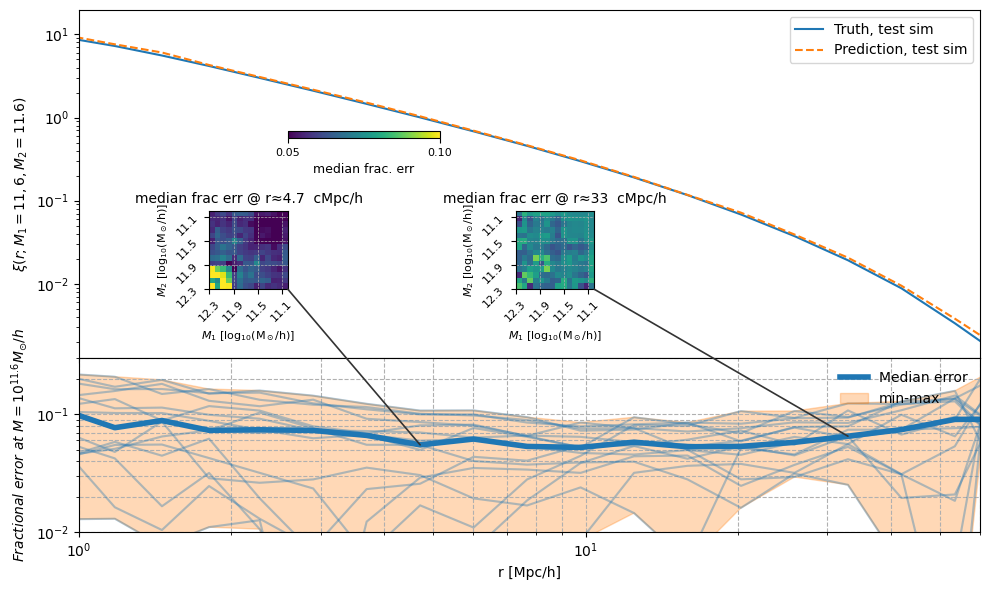

In [57]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=False, gridspec_kw={'hspace': 0, 'height_ratios': [1, 0.5]})
mass_bins = np.unique(plot_xi_emu.emu.mbins[:,0])[::-1]

indm = 7
frac_errs = plot_xi_emu.frac_errs[:,indm, indm,:]


ax[0].plot(plot_xi_emu.rbins, plot_xi_emu.truth[35,indm, indm,:], color='C0', alpha=1, label='Truth, test sim')
ax[0].plot(plot_xi_emu.rbins, plot_xi_emu.pred[35,indm, indm,:], color='C1', alpha=1, label='Prediction, test sim', ls='--')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\xi(r; M_1=11,6, M_2=11.6)$')
#ax[0].grid(which='both', linestyle='--', linewidth=0.8)
ax[0].legend(loc='upper right')
ax[0].set_xlim(1,60)

#percentile_to_use = [2.5, 50, 97.5]
percentile_to_use = [0, 50, 100]
#percentile_err = np.nanpercentile(frac_errs[remaining_sims,:], percentile_to_use, axis=0)
#print(percentile_err.shape)
#ax[1].fill_between(plot_xi_emu.rbins, percentile_err[0], percentile_err[2], color=f'C0', alpha=0.3)
#for s in remaining_sims:
#    ax[1].plot(plot_xi_emu.rbins, frac_errs[s,:], color=f'C0', alpha=0.4)
#ax[1].plot(plot_xi_emu.rbins, percentile_err[1,:], color=f'C0', alpha=1, lw=4, label=f'Narrow-range, {len(remaining_sims)} sims')
#for s in outlier_sims:
#percentile_err = np.nanpercentile(frac_errs[outlier_sims,:], percentile_to_use, axis=0)
#ax[1].fill_between(plot_xi_emu.rbins, percentile_err[0], percentile_err[2], color='C1', alpha=0.3)
#for s in outlier_sims:
#    ax[1].plot(plot_xi_emu.rbins, frac_errs[s,:], color=f'C1', alpha=0.4)
#ax[1].plot(plot_xi_emu.rbins,percentile_err[1], color='C1', alpha=1, lw=4, label=f'Wide-range, {len(outlier_sims)} sims')
#ax[1].set_title(f'Mass bin {mass_bins[indm]}')

# Combining all sims together
all_sims = np.concatenate((remaining_sims, outlier_sims))
percentile_err = np.nanpercentile(frac_errs[all_sims,:], percentile_to_use, axis=0)
ax[1].plot(plot_xi_emu.rbins, percentile_err[1,:], color=f'C0', alpha=1, lw=4, label='Median error')
for s in all_sims:
    ax[1].plot(plot_xi_emu.rbins, frac_errs[s,:], color=f'C0', alpha=0.2)
#for s in outlier_sims:
percentile_err = np.nanpercentile(frac_errs[outlier_sims,:], percentile_to_use, axis=0)
ax[1].fill_between(plot_xi_emu.rbins, percentile_err[0], percentile_err[2], color='C1', alpha=0.3, label='min-max')

ax[1].set_xscale('log')
#ax[1].set_yscale('log')
ax[1].grid(which='both', linestyle='--', linewidth=0.8)
ax[1].set_ylim(1e-2, 0.3)
ax[1].set_xlim(0.5, 50)
ax[1].legend(loc='upper left')
ax[1].set_ylabel(r'$Fractional \ error \ at  \ M = 10^{11.6} M_{\odot}/h$')
ax[1].set_xlabel('r [Mpc/h]')
ax[1].legend(frameon=False, loc='upper right')
ax[1].set_xlim(1,60)
ax[1].set_yscale('log')


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

# ---------- Insets from ax[1] at r ~ 4 and r ~ 30 ----------

# Indices corresponding to the desired radii
ir1, ir2 = 14, 22
x1, x2 = plot_xi_emu.rbins[ir1], plot_xi_emu.rbins[ir2]

# y-positions to connect from: use the overall median across sims at those r
y1 = float(np.nanmedian(frac_errs[remaining_sims, ir1], axis=0))
y2 = float(np.nanmedian(frac_errs[remaining_sims, ir2], axis=0))

# Images to show in the insets
img1 = np.nanmedian(plot_xi_emu.frac_errs[remaining_sims, :, :, ir1], axis=0)  # shape (Nm, Nm)
img2 = np.nanmedian(plot_xi_emu.frac_errs[remaining_sims, :, :, ir2], axis=0)

# Shared color scale for apples-to-apples comparison
vmin = 0.05
vmax = 0.10

# Create two inset axes anchored to ax[1]
# Place them to the right; tweak size/loc as desired
inax1 = inset_axes(ax[1], width="28%", height="45%", loc="lower left",
                   bbox_to_anchor=(0.03, 1.3, 1.0, 1.0),  # (x0, y0, width, height) in axes fraction
                   bbox_transform=ax[1].transAxes, borderpad=1.2)
inax2 = inset_axes(ax[1], width="28%", height="45%", loc="lower left",
                   bbox_to_anchor=(0.37, 1.3, 1.0, 1.0),
                   bbox_transform=ax[1].transAxes, borderpad=1.2)

# Show the images
extent = [mass_bins[0], mass_bins[-1], mass_bins[0], mass_bins[-1]]  # (xmin, xmax, ymin, ymax)
im1 = inax1.imshow(img1, origin='lower', vmin=vmin, vmax=vmax, extent=extent)
im2 = inax2.imshow(img2, origin='lower', vmin=vmin, vmax=vmax, extent=extent)

# Optional: label the insets by the corresponding radius
inax1.set_title(fr"median frac err @ r≈{x1:.2g}  cMpc/h", fontsize=10)
inax2.set_title(fr"median frac err @ r≈{x2:.2g}  cMpc/h", fontsize=10)


# inset ticks 
for iax in (inax1, inax2):
    iax.tick_params(labelsize=8, rotation=45)
    iax.set_xticks(mass_bins[::4])
    iax.set_yticks(mass_bins[::4])
    iax.grid(which='both', linestyle='--', linewidth=0.5)
    iax.set_xlabel(r'$M_1$ [log$_{10}$(M$_\odot$/h)]', fontsize=8)
    iax.set_ylabel(r'$M_2$ [log$_{10}$(M$_\odot$/h)]', fontsize=8)

# Draw connections from the curve points to the insets (left-center of each inset)
con1 = ConnectionPatch(xyA=(x1, y1), coordsA=ax[1].transData,
                       xyB=(1, 0), coordsB=inax1.transAxes,
                       arrowstyle='-', lw=1.2, color='0.2')
con2 = ConnectionPatch(xyA=(x2, y2), coordsA=ax[1].transData,
                       xyB=(1, 0.), coordsB=inax2.transAxes,
                       arrowstyle='-', lw=1.2, color='0.2')
fig.add_artist(con1)
fig.add_artist(con2)

# Optional: a single shared colorbar for both insets
cax = inset_axes(ax[1], width="28%", height="4%", loc="lower left",
                 bbox_to_anchor=(0.22, 2.2, 0.6, 1.0),
                 bbox_transform=ax[1].transAxes, borderpad=0.8)
cb = fig.colorbar(im1, cax=cax, orientation='horizontal')
cb.ax.tick_params(labelsize=8)
cb.set_ticks(np.arange(vmin, vmax+0.01, 0.05))
cb.set_label('median frac. err', fontsize=9)

fig.tight_layout()
fig.savefig('/home/qezlou/HD2/HETDEX/draft/gal-emu-paper/figures/xi_hh_loocv.pdf')
